# Q-Learning in Grid World - Comprehensive Training Guide

This notebook presents a complete implementation of the **Q-Learning** training process. It acts as the bridge between the custom **Grid World Environment** and the **Learning Agent**, demonstrating how an autonomous system evolves from random movements to optimal navigation.

---

## 🛠️ 1. Integrated Components
The training setup combines three critical elements to facilitate learning:

* **GridWorldEnv**: A discrete 2D grid where an agent seeks a gold reward while avoiding traps.
* **Agent**: A Q-learning entity that maintains a Q-table to store the "value" of actions in various states.
* **Transition Structure**: A structured `namedtuple` used to store experiences in the format: `(state, action, reward, next_state, done)`.



---

## 🧠 2. The Q-Learning Process
The notebook follows a standard Reinforcement Learning workflow where the agent learns by trial and error.

### A. The Training Loop (`run_qlearning`)
For a set number of episodes (e.g., 50), the following cycle occurs:
1.  **Reset**: The environment starts at a fixed position.
2.  **Act**: The agent chooses an action (Up, Down, Left, Right) using its **Epsilon-Greedy** policy.
3.  **Step**: The environment executes the action and returns a reward (+1 for gold, -1 for traps, 0 otherwise) and the new state.
4.  **Learn**: The agent updates its Q-table using the **Bellman Equation** update rule.
5.  **Iterate**: This repeats until the agent hits a terminal state (Gold or Trap).

### B. The Update Equation
The agent updates its knowledge by comparing its current estimate with the actual outcome:
* It calculates the **Target**: (Immediate Reward) + (Discounted Value of the Best Possible Future Action).
* It adjusts the **Q-Value**: Moves the old value slightly toward this new target based on the **Learning Rate**.



---

## 📈 3. Performance Analysis
The notebook uses visualization to prove that learning is taking place.

* **Moves per Episode**: Initially, the agent wanders aimlessly, resulting in a high number of steps. As it learns the layout, this number drops and stabilizes at the shortest possible path.
* **Total Reward**: Early on, the agent frequently hits traps (negative reward). Over time, the reward curve shifts toward +1.0, showing it has learned to reach the gold consistently.



---

## 📊 4. Training Results and Observations
The execution logs provided in the notebook reveal the "Aha!" moment of the agent:

* **Exploration Phase**: In the first 10 episodes, the agent is purely exploratory. It often falls into traps because it hasn't associated specific states with negative outcomes yet.
* **Discovery**: Around Episode 12, the agent reaches the Gold for the first time. The Q-table begins to propagate this "success" back to the preceding states.
* **Optimization (Convergence)**: By Episode 40, the agent has effectively "solved" the grid. It no longer hits traps and takes a consistent, minimal path to the Gold state, demonstrating a fully formed optimal policy.

In [6]:
from grid_world import GridWorldEnv
from agent import Agent
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

In [7]:
np.random.seed(28)

Transition = namedtuple(
    'Transition', ('state', 'action', 'reward', 'next_state', 'done')
)

def run_qlearning(agent, env, num_episodes= 50):
    history = []
    for episode in range(num_episodes):
        state, info = env.reset()
        env.render(mode= 'human')
        final_reward, n_moves = 0.0, 0
        while True:
            action = agent.choose_action(state)
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            agent._learn(Transition(state, action, reward, obs, done))
            state = obs
            env.render(mode= 'human', done= done)
            n_moves += 1
            if done:
                break
            final_reward = reward
        history.append((n_moves, final_reward))
        print(f'Episode {episode}: Reward {final_reward:.2} '
              f'#Moves {n_moves}')
    return history

In [14]:
def plot_learning_history(history):
    fig = plt.figure(1, figsize= (14, 10))
    ax = fig.add_subplot(2, 1, 1)
    episodes = np.arange(len(history))
    moves = np.array([h[0] for h in history])
    plt.plot(episodes, moves, lw= 4, marker= 'o', markersize= 10)
    ax.tick_params(axis= 'both', which= 'major', labelsize= 15)
    plt.xlabel('Episodes', size= 20)
    plt.ylabel('# Moves', size= 20)
    ax = fig.add_subplot(2, 1, 2)
    rewards = np.array([h[1] for h in history])
    plt.step(episodes, rewards, lw= 4)
    ax.tick_params(axis= 'both', which= 'major', labelsize= 15)
    plt.xlabel('Episodes', size= 20)
    plt.ylabel('# Moves', size= 20)
    plt.savefig('q-learning-history.png', dpi= 300)
    plt.show()

[16, 22, 15, 10]
Episode 0: Reward -1.0 #Moves 10
Episode 1: Reward -1.0 #Moves 39
Episode 2: Reward -1.0 #Moves 8
Episode 3: Reward -1.0 #Moves 28
Episode 4: Reward -1.0 #Moves 38
Episode 5: Reward -1.0 #Moves 275
Episode 6: Reward -1.0 #Moves 100
Episode 7: Reward -1.0 #Moves 18
Episode 8: Reward -1.0 #Moves 26
Episode 9: Reward -1.0 #Moves 56
Episode 10: Reward -1.0 #Moves 64
Episode 11: Reward -1.0 #Moves 31
Episode 12: Reward 1.0 #Moves 237
Episode 13: Reward -1.0 #Moves 203
Episode 14: Reward 1.0 #Moves 95
Episode 15: Reward 1.0 #Moves 363
Episode 16: Reward -1.0 #Moves 57
Episode 17: Reward 1.0 #Moves 50
Episode 18: Reward 1.0 #Moves 65
Episode 19: Reward 1.0 #Moves 57
Episode 20: Reward -1.0 #Moves 100
Episode 21: Reward 1.0 #Moves 43
Episode 22: Reward 1.0 #Moves 19
Episode 23: Reward 1.0 #Moves 46
Episode 24: Reward 1.0 #Moves 21
Episode 25: Reward 1.0 #Moves 23
Episode 26: Reward 1.0 #Moves 24
Episode 27: Reward -1.0 #Moves 9
Episode 28: Reward -1.0 #Moves 14
Episode 29: Rew

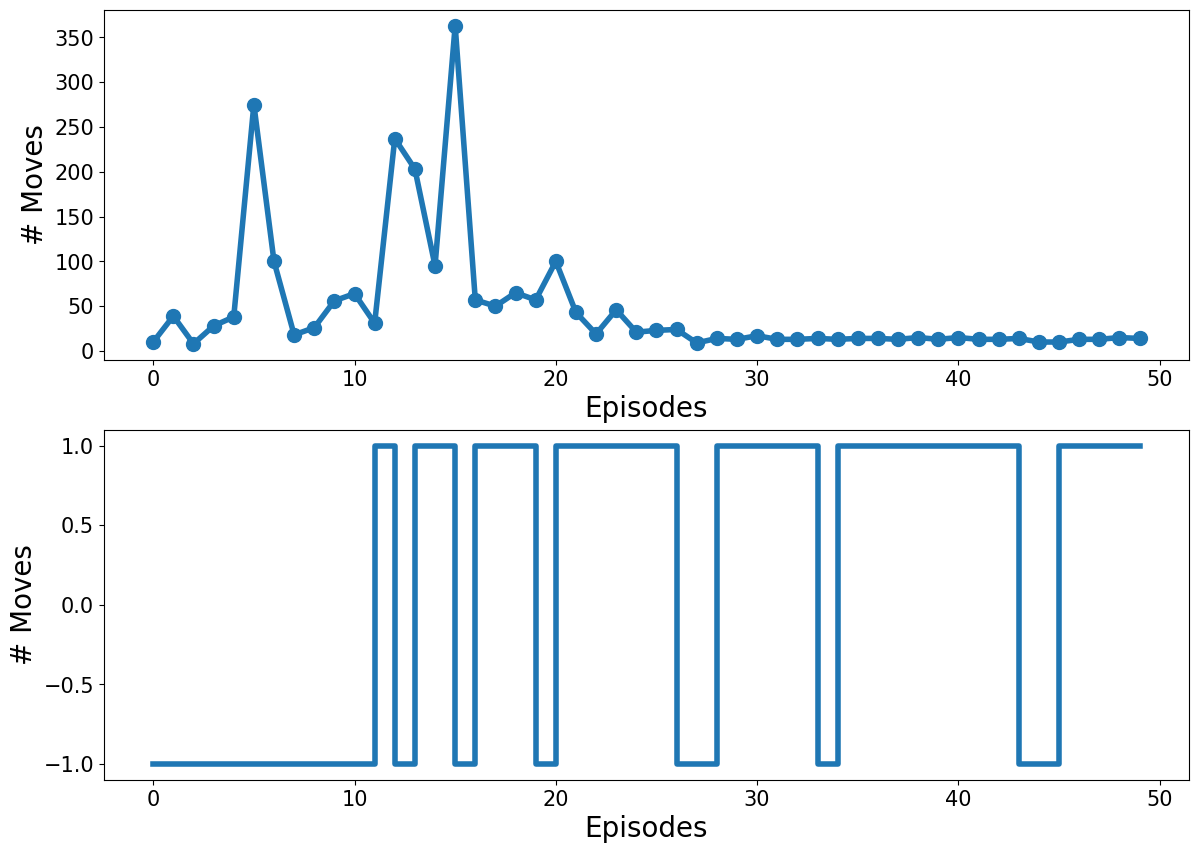

In [15]:
if __name__ == '__main__':
    env = GridWorldEnv(num_rows= 5, num_cols= 6)
    agent = Agent(env)
    history = run_qlearning(agent, env)
    env.close()
    plot_learning_history(history)